# Modeling

The purpose of this notebook is to show steps in modeling. The three models created include Linear Regression, Decision Tree and Random Forest.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [36]:
df = pd.read_csv('liquor_dataset_.csv', index_col = 0, dtype={'week': object, 'store_number': object})

In [37]:
df.head()

,week,store_number,general_alcohol_category,city,county,initial claims,volume_sold_(liters)
0,1,2500,amaretto,AMES,STORY,167.0,6.75
1,1,2500,amaretto,AMES,STORY,248.0,3.75
2,1,2500,amaretto,AMES,STORY,306.0,2.25
3,1,2500,brandy,AMES,STORY,159.0,33.73
4,1,2500,brandy,AMES,STORY,167.0,33.80


In [38]:
df = pd.concat([df.drop('general_alcohol_category', axis=1), pd.get_dummies(df['general_alcohol_category'])], axis=1)

In [39]:
df = pd.concat([df.drop('city', axis = 1),pd.get_dummies(df['city'])], axis=1)

In [40]:
df = pd.concat([df.drop('county', axis = 1), pd.get_dummies(df['county'])], axis=1)

In [41]:
df.shape

(477063, 171)

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

#here I'm ending up with 170 regressors?
X = df.drop(['volume_sold_(liters)'], axis =1)
y = df[['volume_sold_(liters)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

## Scaling

In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Linear Regression

As the data is scaled and split in to training and testing set, I am creating a linear regression training on X_train and y_train.

In [44]:
from sklearn import linear_model
rModel = linear_model.LinearRegression()

In [45]:
model = rModel.fit(X_train_scaled, y_train)

Using accuracy as the evaluation metric.

In [46]:
#prints accuracy of the model agains the training data
score = model.score(X_train_scaled, y_train)
print(score)

0.250640513337126


In [47]:
y_pred = model.predict(X_test_scaled)

This scatter plot shows Test vs Predicted 

The visualization below shows y test vs predicted values.

Text(0, 0.5, 'y_pred')

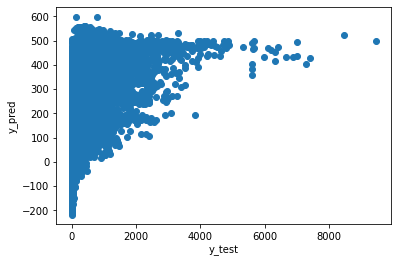

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Random Forest

A regression tree is appropriate when the target variable is continuous.

Using the same dataset as the linear regression above:
    

In [68]:
y = np.array(df['volume_sold_(liters)'])
X = np.array(X)

In [69]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (357797, 170)
Training Labels Shape: (357797, 1)
Testing Features Shape: (119266, 170)
Testing Labels Shape: (119266, 1)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [71]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [73]:
predictions = rf.predict(X_test_scaled)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 69.48


In [74]:
feature_list = list(df.columns)

Taking a look at feature importances, to see which variables are the most important predictors of volume sold.

In [75]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: store_number         Importance: 0.28
Variable: initial claims       Importance: 0.22
Variable: week                 Importance: 0.2
Variable: tequila              Importance: 0.09
Variable: vodka                Importance: 0.09
Variable: DENISON              Importance: 0.02
Variable: gin                  Importance: 0.01
Variable: other                Importance: 0.01
Variable: TOLEDO               Importance: 0.01
Variable: JEFFERSON            Importance: 0.01
Variable: volume_sold_(liters) Importance: 0.0
Variable: amaretto             Importance: 0.0
Variable: bourbon              Importance: 0.0
Variable: brandy               Importance: 0.0
Variable: cocktail             Importance: 0.0
Variable: creme                Importance: 0.0
Variable: rum                  Importance: 0.0
Variable: scotch               Importance: 0.0
Variable: spirit               Importance: 0.0
Variable: whiskey              Importance: 0.0
Variable: ALBIA                Importance: 0.0
Vari

## Hyperparameter Tuning

This step involves GridSearch to search for the combination of tree depth and number of trees that produces a model with the highest accuracy.

In [86]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2,8,10],
    'n_estimators': [5,8]
}

In [87]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [88]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.2min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 8

In [89]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 8}

In [94]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [99]:
#grid_accuracy = eval(best_grid, X_test_scaled, y_test)

## Decision Tree


In [100]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_scaled, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_scaled)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [104]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

57713.34878320476

In [105]:
np.mean(y_test)

124.97621736286956

In [106]:
from sklearn.metrics import r2_score

In [107]:
#same as above but scaled betweeen 0-1
r2_score(y_test, y_pred)

0.19965616221248594

In [108]:
# Get numerical feature importances
importances = list(entr_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: store_number         Importance: 0.28
Variable: initial claims       Importance: 0.22
Variable: week                 Importance: 0.2
Variable: tequila              Importance: 0.09
Variable: vodka                Importance: 0.09
Variable: DENISON              Importance: 0.02
Variable: gin                  Importance: 0.01
Variable: other                Importance: 0.01
Variable: BURLINGTON           Importance: 0.01
Variable: TOLEDO               Importance: 0.01
Variable: JEFFERSON            Importance: 0.01
Variable: volume_sold_(liters) Importance: 0.0
Variable: amaretto             Importance: 0.0
Variable: bourbon              Importance: 0.0
Variable: brandy               Importance: 0.0
Variable: cocktail             Importance: 0.0
Variable: creme                Importance: 0.0
Variable: rum                  Importance: 0.0
Variable: scotch               Importance: 0.0
Variable: spirit               Importance: 0.0
Variable: whiskey              Importance: 0.0
Var

In [125]:
param_grid = {
    'max_depth': [2,4,8]
}

In [126]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = entr_model, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [127]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   13.1s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.0s finished


{'max_depth': 8}

In [124]:
entr_model.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])